# Project 3(5c): NLP - Insights from Hugging Face Models 

Done by: Richelle-Joy Chia, a Redditor-and-data-science enthusiast! 

Problem statement: Through natural language processing and classification models, how can we help Reddit and other interested parties classify posts based on the texts used by people who may be depressed or anxious? Furthermore, how can sentiment analysis be utilized to detect emotions associated with depression and anxiety?

In [34]:
# import libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import sys
import tensorflow.keras
import tensorflow as tf
import numpy as np
from tqdm import tqdm 
from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline # loading pre-trained models for contextual word embeddings (Hugging Face)


In [3]:
# import Model 1 data (primary emotions)

priemo_data = pd.read_csv('../7emo_data_updated.csv')

In [4]:
# import Model 2 data (secondary emotions)

secemo_data = pd.read_csv('../28emo_data.csv')

## Analysis of Model 1 - Primary emotions 

### Differences in emotions based on the two chosen subreddits (anxiety and depression)
- In the anxiety dataset (0), fear is the most common emotion, followed by sadness. This makes sense as people with anxiety tend to have persistent feelings of uneasiness and worry. 
- In the depression dataset (1), sadness is the most common emotion, followed by fear. This is consistent with the theoretical aspect of depression, whereby people tend to have persistent feelings of sadness and loss of interest.  

In [6]:
## counting the number of emotions in the dataset and sorted by subreddits
priemo_data.groupby('subreddit').labels_jhart.value_counts()

subreddit  labels_jhart
0          fear            8512
           sadness         4161
           joy             1032
           surprise         693
           anger            513
           neutral          200
           disgust           20
1          sadness         9164
           fear            2362
           joy             1264
           anger            934
           neutral          564
           surprise         469
           disgust           75
Name: labels_jhart, dtype: int64

<AxesSubplot: >

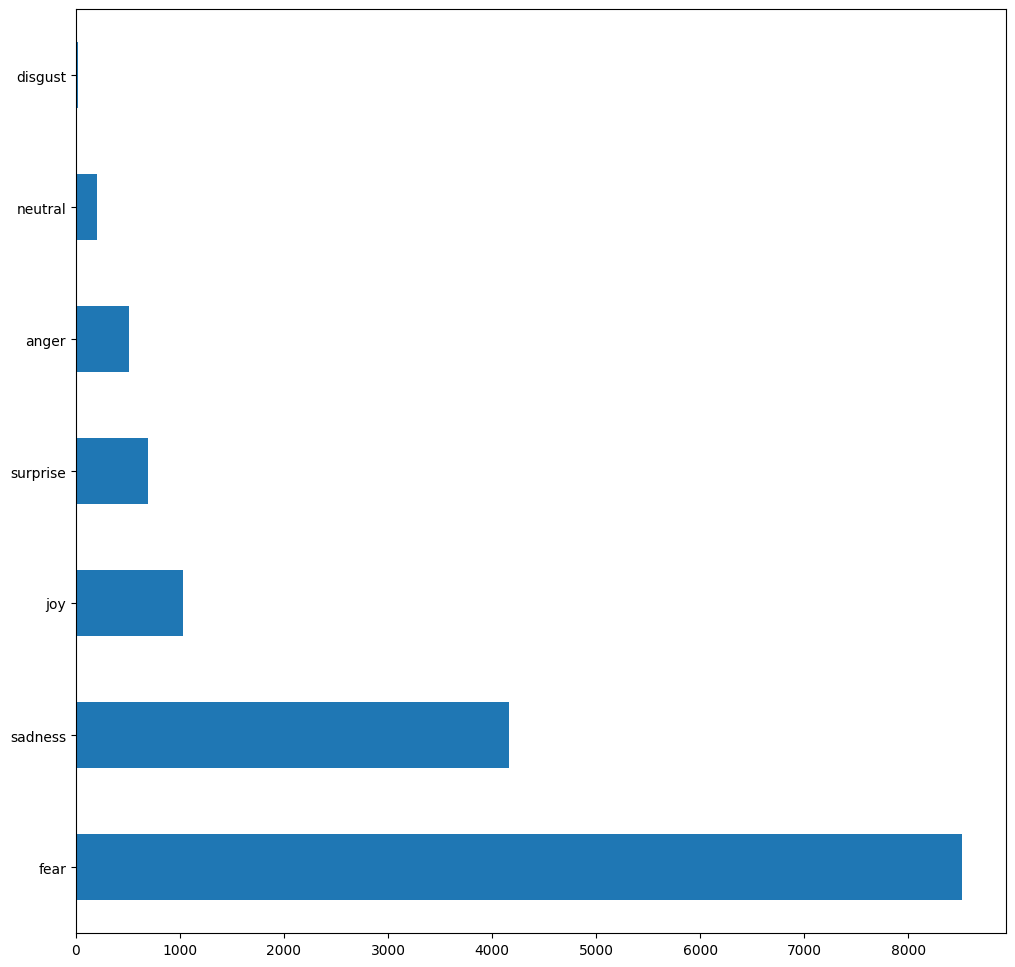

In [8]:
# display the barplot - anxiety

plt.figure(figsize=(12,12))
priemo_data[priemo_data['subreddit'] == 0]['labels_jhart'].value_counts().plot(kind='barh')

<AxesSubplot: >

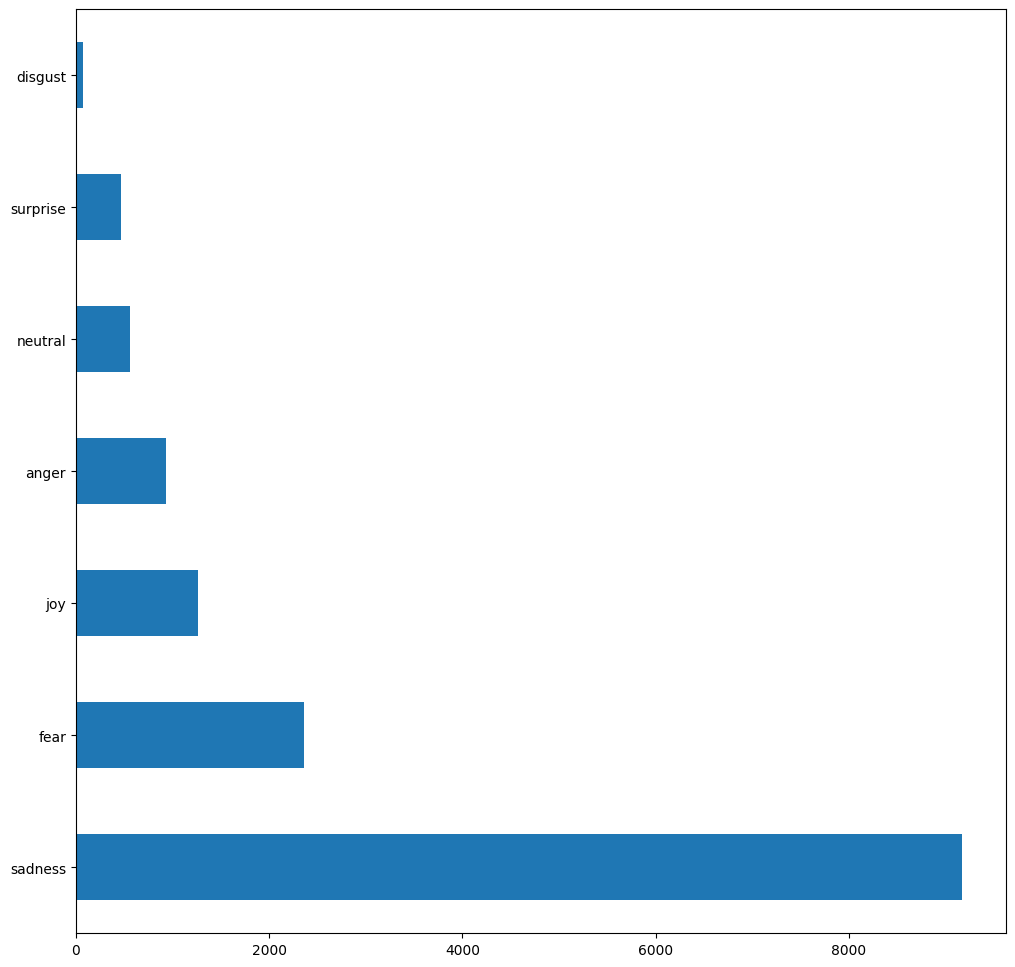

In [7]:
# display the barplot - depression

plt.figure(figsize=(12,12))
priemo_data[priemo_data['subreddit'] == 1]['labels_jhart'].value_counts().plot(kind='barh')

### Examining the emotion attached to a randomly selected text

In [28]:
### locate a random datapoint from the anxiety subreddit to show the probability of the emotion getting predicted

display(priemo_data.iloc[22])

### locate a random datapoint from the depression subreddit to show the probability of the emotion getting predicted

display(priemo_data.iloc[29965])

date_time                                              2022-10-03 06:42:13
subreddit                                                                0
selftext                 Help, please! Most of the time I am very anxio...
title                                                        Help, please!
joined                   Help, please! Most of the time I am very anxio...
char_count                                                             290
word_count                                                              65
joined_new               help  please! most time i anxious i can't eat ...
joined_new_char_count                                                  173
joined_new_word_count                                                   34
labels_jhart                                                          fear
scores_jhart                                                      0.921861
Name: 22, dtype: object

date_time                                              2022-08-23 12:09:46
subreddit                                                                1
selftext                 I feel so empty now I don't know what to do an...
title                                                  I feel so empty now
joined                   I feel so empty now I don't know what to do an...
char_count                                                             610
word_count                                                             124
joined_new               i feel i don't know anymore  just want end fun...
joined_new_char_count                                                  322
joined_new_word_count                                                   56
labels_jhart                                                           NaN
scores_jhart                                                           NaN
Name: 29965, dtype: object

### Test out model 1 prediction

In [31]:
# run pipeline to activate model 1

classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True, truncation=True)

# anxiety subreddit
classifier("help  please! most time i anxious i can't eat creates problem me  i barely in high school mental health  what i do  i don't want end poor sick  my weight is    kg height     centimeter i      ")

[[{'label': 'anger', 'score': 0.010254034772515297},
  {'label': 'disgust', 'score': 0.0006484366022050381},
  {'label': 'fear', 'score': 0.9233637452125549},
  {'label': 'joy', 'score': 0.013730892911553383},
  {'label': 'neutral', 'score': 0.004991785157471895},
  {'label': 'sadness', 'score': 0.03698420897126198},
  {'label': 'surprise', 'score': 0.010026917792856693}]]

This text was retrieved from the anxiety sub-reddit and the model shows that the person is most likely experiencing alot of fear (probability - 0.923). In other words, this person acknowledges that he is experiencing anxiety (based on his proactiveness to post in the particular subreddit), but fear is possibly one of the underlying root emotions behind his anxiety. 

In [30]:
# depression subreddit
classifier("i feel i don't know anymore  just want end fun anymore lost best friend gone right feel pulled trigger myself  worse can't shed tear don't feel life really just cruel  don't know make new friends  feel just dragging foot life  life get better  say  doesn't just everything  wish feel it's fucked  sorry rant just need vent")

[[{'label': 'anger', 'score': 0.06998537480831146},
  {'label': 'disgust', 'score': 0.0007775462581776083},
  {'label': 'fear', 'score': 0.0007197745144367218},
  {'label': 'joy', 'score': 0.009080398827791214},
  {'label': 'neutral', 'score': 0.001551631954498589},
  {'label': 'sadness', 'score': 0.9130826592445374},
  {'label': 'surprise', 'score': 0.004802568815648556}]]

This text was retrieved from the depression sub-reddit and the model shows that the person is most likely experiencing alot of sadness (probability - 0.913). In other words, this person acknowledges that he is experiencing depression(based on his proactiveness to post in the particular subreddit) and sadness is one of the underlying root emotions behind his depressed state.

## Model 2 - Primary and secondary emotions 

### Differences in emotions based on the two chosen subreddits (anxiety and depression)

- In the anxiety dataset (0), fear is the most common emotion, followed by nervousness. This differs model 1 in that sadness is the second top scoring emotion. The results from this model makes sense as well. 
- In the depression dataset (1), sadness is the most common emotion, followed by neutral. This differs from model 1 in that fear is the second top scoring emotion. It is possible that depressed people are neutral (perhaps indifferent) about the things happening around them.

In [30]:
secemo_data.groupby('subreddit').labels.value_counts()

subreddit  labels        
0          fear              5048
           nervousness       2250
           neutral           1587
           gratitude          975
           sadness            874
           anger              454
           caring             372
           realization        358
           approval           307
           curiosity          299
           annoyance          295
           joy                238
           embarrassment      230
           disgust            214
           love               196
           confusion          188
           amusement          180
           admiration         178
           disappointment     153
           remorse            130
           desire             123
           excitement         111
           optimism            96
           surprise            80
           grief               65
           disapproval         64
           relief              43
           pride               23
1          sadness    

### Test out model 2 prediction

In [44]:
# run pipeline to activate model 2 (in this scenario, scores refer to the probability of the emotion occuring) 

tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
model = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")

emotion = pipeline('sentiment-analysis', 
                    model='arpanghoshal/EmoRoBERTa',  return_all_scores= True, truncation=True)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


#### To ensure coherency, I ran the same set of texts from Model 1 to predict the emotions from Model 2.

In [41]:
# anxiety subreddit

emotion_labels = emotion("help  please! most time i anxious i can't eat creates problem me  i barely in high school mental health  what i do  i don't want end poor sick  my weight is    kg height     centimeter i      ")
print(emotion_labels)

[[{'label': 'admiration', 'score': 8.110280759865418e-06}, {'label': 'amusement', 'score': 0.00010743459279183298}, {'label': 'anger', 'score': 8.416785567533225e-05}, {'label': 'annoyance', 'score': 0.00010395584104117006}, {'label': 'approval', 'score': 0.00030236190650612116}, {'label': 'caring', 'score': 0.02638205699622631}, {'label': 'confusion', 'score': 0.0008638768922537565}, {'label': 'curiosity', 'score': 0.00032629433553665876}, {'label': 'desire', 'score': 0.00030101582524366677}, {'label': 'disappointment', 'score': 0.0006672712625004351}, {'label': 'disapproval', 'score': 5.241174585535191e-05}, {'label': 'disgust', 'score': 4.451853601494804e-05}, {'label': 'embarrassment', 'score': 0.00012301038077566773}, {'label': 'excitement', 'score': 0.00015844979498069733}, {'label': 'fear', 'score': 0.5636081695556641}, {'label': 'gratitude', 'score': 8.148824417730793e-05}, {'label': 'grief', 'score': 0.002021008636802435}, {'label': 'joy', 'score': 0.00011956916569033638}, {'l

This text was retrieved from the anxiety sub-reddit and the model shows that the person is most likely experiencing alot of fear (probability - 0.923). This top predicted emotion is the same as in Model 1. 

In [45]:
# depression subreddit
emotion_labels = emotion("i feel i don't know anymore  just want end fun anymore lost best friend gone right feel pulled trigger myself  worse can't shed tear don't feel life really just cruel  don't know make new friends  feel just dragging foot life  life get better  say  doesn't just everything  wish feel it's fucked  sorry rant just need vent")
print(emotion_labels)

[[{'label': 'admiration', 'score': 0.0002505186421331018}, {'label': 'amusement', 'score': 0.00813301745802164}, {'label': 'anger', 'score': 0.082116037607193}, {'label': 'annoyance', 'score': 0.004852699115872383}, {'label': 'approval', 'score': 0.0001263701997231692}, {'label': 'caring', 'score': 0.017523249611258507}, {'label': 'confusion', 'score': 6.720117380609736e-05}, {'label': 'curiosity', 'score': 3.6611600080505013e-05}, {'label': 'desire', 'score': 0.003282681806012988}, {'label': 'disappointment', 'score': 0.022039640694856644}, {'label': 'disapproval', 'score': 0.0011666303034871817}, {'label': 'disgust', 'score': 0.008392107672989368}, {'label': 'embarrassment', 'score': 0.001392457983456552}, {'label': 'excitement', 'score': 0.0001456993049941957}, {'label': 'fear', 'score': 0.005570429842919111}, {'label': 'gratitude', 'score': 0.0007323755417019129}, {'label': 'grief', 'score': 0.10234884917736053}, {'label': 'joy', 'score': 0.003918071743100882}, {'label': 'love', 's

This text was retrieved from the anxiety sub-reddit and the model shows that the person is most likely experiencing alot of sad (probability - 0.693). This top predicted emotion is the same as in Model 1 as well.

### Overall thoughts on both models

I tested out both models to see if they would give the same prediction, turns out they did. However, this is only 1 data point and should be tested further.

On another note, I attempted to compare the results from the model against some manual coding and there were some discrepancies. Given that this project is a pilot one, it would be important for future projects to take a deeper look. In sum, Model 2 does not seem to predict that well, especially on long texts. Another reaason could be the large number of emotions (28) present in Model 2, compared to a smaller number of emotions (7) present in Model 1.

## Conclusion

To conclude, I hope that this project is a first step to work towards predicting/identifying the emotions associated with certain mood disorders. I was able to accurately classify topics based on texts using the proposed model. Moreover, this work shed light on the underlying feelings behind one's mood disorder. Both models provided great insights as to how the Redditors may have felt when writing the posts. This alone is an added layer of showcasing certain root emotions, beyond depression or anxiety.

However, there are some limitations that we need to consider for future work. 
- Data were retrieved from a specific time period. This could be a biased sample and more data could be included and across different time periods.
- Only texts, specifically lowercase, were included. This may have excluded punctuautions (e.g., !!! and ...) whereby the former may indicate screaming for help and the latter may indiciate feeling dejected. Emojis, pictures, videos, and gifs were also excluded. "A picture speaks a thousand words" and it is important to examine these in future.
- The data only included English texts. As such, the results may only be generalizable to English speaking countries. Including texts from other languages would be helpful in broadening the scope of NLP and mood disorders.
- The geographical location is unknown. Looking at where the posts were published could allow us to provide more support where its needed and highlight the issues to government bodies.

## Recommendations for various parties (e.g., developer, moderators, stakeholders)
All parties could work together to: 
- create a system whereby it can automatically identify key words and provide support by flashing the suicide hotline. 
- create a dashboard for moderators. The top emotions can be shown after a post has been publsihed. Thereafter, the moderators can pin a response message to provide support to redditors.
- flag out potential posts that match certain emotions first, examine the links between the posts and suicide ideation, before making accurate predictions. 

